# 答疑解惑

## make_dot

`make_dot` 是 **Graphviz** 库中的一个函数（通常通过 `torchviz` 或 `graphviz` 包提供），用于可视化计算图（如神经网络结构）。它能将模型的计算流程转换为图形表示，便于理解模型的结构和数据流向。


### **一、`make_dot` 函数的基本用法**
#### 1. **核心功能**
- 将 PyTorch/TensorFlow 模型的计算图转换为可视化图形。
- 通过节点（nodes）表示张量（Tensors）或操作（Operations），边（edges）表示数据流向。

#### 2. **安装依赖**
```bash
pip install torchviz graphviz
```
注意：需先安装 Graphviz 系统工具（如 macOS 可用 `brew install graphviz`）。


### **二、解释 `clf_view = make_dot(y, params=...)`**
#### 1. **代码功能**
这行代码使用 `make_dot` 可视化一个分类器（`clf`）的计算图，包含：
- `y`：模型的输出张量（如预测结果）。
- `params`：需要显示的参数（包括模型权重和输入数据）。

#### 2. **关键参数解析**
- **`y`**：计算图的输出节点（通常是损失函数或预测值）。
- **`params`**：一个字典，包含需要可视化的参数：
  ```python
  dict(list(clf.named_parameters()) + [("x", input_sample)])
  ```
  - `clf.named_parameters()`：获取模型的所有参数（如权重、偏置）。
  - `[("x", input_sample)]`：手动添加输入样本 `input_sample`，命名为 `"x"`。
  - **合并参数**：将模型参数和输入数据合并为一个字典。

#### 3. **完整示例**
```python
import torch
import torch.nn as nn
from torchviz import make_dot

# 定义一个简单的分类器
class SimpleClassifier(nn.Module):
    def __init__(self):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(x))

# 创建模型和输入
clf = SimpleClassifier()
input_sample = torch.randn(1, 10, requires_grad=True)
y = clf(input_sample)  # 前向传播

# 可视化计算图
clf_view = make_dot(y, params=dict(list(clf.named_parameters()) + [("x", input_sample)]))
clf_view.render("classifier_graph", format="png", cleanup=True)
```

#### 4. **可视化效果**
- **节点**：包括输入 `x`、中间层输出、模型参数（`fc1.weight`、`fc1.bias` 等）。
- **边**：表示数据流动方向（如从 `x` 到 `fc1` 再到 `fc2`）。


### **三、注意事项**
1. **requires_grad=True**：
   - 若要显示某个张量（如输入），需确保其 `requires_grad=True`（示例中 `input_sample` 已设置）。

2. **保存图形**：
   - `dot.render("filename", format="png")`：保存为 PNG 图片。
   - `dot.view()`：直接打开预览（需系统支持）。



In [7]:
!pip install torchviz graphviz

In [1]:
!dot -V

dot - graphviz version 12.2.1 (20241206.2353)


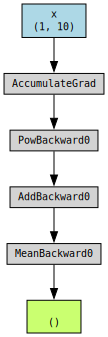

In [ ]:
import torch
from torchviz import make_dot
from IPython.display import display, SVG

# 定义一个简单模型
x = torch.randn(1, 10, requires_grad=True)
y = x ** 2 + 3
y = y.mean()

# 创建可视化
dot = make_dot(y, params={"x": x})
# dot.render("simple_graph", format="png", cleanup=True)
display(SVG(dot.pipe(format="svg")))

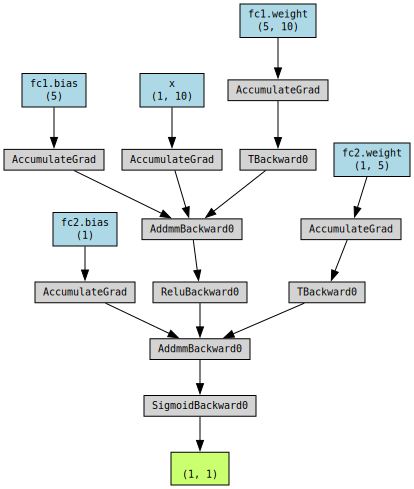

In [10]:
import torch
import torch.nn as nn
from torchviz import make_dot
from IPython.display import display, SVG

# 定义一个简单的分类器
class SimpleClassifier(nn.Module):
    def __init__(self):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(x))

# 创建模型和输入
clf = SimpleClassifier()
input_sample = torch.randn(1, 10, requires_grad=True)
y = clf(input_sample)  # 前向传播

# 可视化计算图
clf_view = make_dot(y, params=dict(list(clf.named_parameters()) + [("x", input_sample)]))
# clf_view.view()
# 转换为 SVG 格式并显示
svg = clf_view.pipe(format='svg')
display(SVG(svg))

## np.random.choice()

np.random.choice 是 NumPy 库中用于从给定数组或列表中随机抽样的函数。它可以根据指定的条件随机选择元素，常用于数据采样、随机实验设计等场景。

一、np.random.choice 的基本用法
核心参数
```python
np.random.choice(a, size=None, replace=True, p=None)
```

- a：输入的一维数组或整数 n（表示 range(n)）。
- size：输出的样本大小（整数或元组）。
- replace：是否允许重复抽样（True 表示有放回，False 表示无放回）。
- p：可选参数，指定每个元素被选中的概率（数组，需与 a 长度一致且和为 1）。

In [1]:
# 示例 1：从数组中随机选择元素
import numpy as np

# 从一维数组中随机选出三个，允许重复
arr = np.array([1, 2, 3, 4, 5])
sample = np.random.choice(arr, size=3, replace=True)
print(sample) # 出现了重复的元素5

[5 5 2]


In [4]:
# 示例 2：无放回抽样（不允许重复）
# 从 0~4 中随机选择 3 个不重复的整数
sample = np.random.choice(5, size=3, replace=False)
print(sample)  # 可能输出：[2, 4, 0]（不重复）

[2 3 0]


In [5]:
# 示例 3：指定概率分布
# 按概率 p 抽样（元素 0 的概率为 0.1，元素 1 的概率为 0.6，元素 2 的概率为 0.3）
sample = np.random.choice([0, 1, 2], size=5, p=[0.1, 0.6, 0.3])
print(sample)  # 可能输出：[1, 1, 2, 1, 0]（1 出现的次数较多）

[2 0 1 1 0]


## BatchNorm2d

在卷积神经网络（CNN）中，BatchNorm2d（二维批量归一化）是一种常用的正则化技术，用于加速训练并提高模型稳定性。下面结合你提供的代码，详细解释其作用和原理。

### 一、BatchNorm2d 的工作原理
对于每个批次（Batch）的输入特征图，`BatchNorm2d` 独立对每个通道进行归一化，公式为：
```
y = γ * (x - μ) / √(σ² + ε) + β
```
- **μ**：批次内每个通道的均值。
- **σ²**：批次内每个通道的方差。
- **γ** 和 **β**：可学习的缩放因子和偏移量（模型参数）。
- **ε**：小常数（如 `1e-5`），防止分母为零。

### 二、结合代码示例解释
在你的 CNN 中，每个卷积层后都跟着 `BatchNorm2d`：
```python
nn.Conv2d(3, 64, 3, 1, 1),  # 输入3通道，输出64通道
nn.BatchNorm2d(64),         # 对64个通道分别归一化
nn.ReLU(),
```

### 三、BatchNorm2d 的优势示例
#### **1. 加速训练**
假设没有 BatchNorm：
- 深层网络中，前层参数的微小变化可能导致后层输入分布剧烈变化。
- 学习率需要设置得很小，训练缓慢。

加入 BatchNorm 后：
- 每层输入分布更稳定，可使用更大学习率。
- 实验表明，训练速度可提升 5-10 倍。

#### **2. 提高泛化能力**
- BatchNorm 引入了一定的随机性（批次统计量的波动），类似 Dropout 的正则化效果。
- 在你的代码中，5 个 BatchNorm 层共同作用，使模型更健壮。

#### **3. 缓解梯度问题**
- 在深层 CNN 中，未归一化的激活值可能导致梯度消失或爆炸。
- BatchNorm 保持数据分布在合理范围（如均值 0，方差 1），稳定梯度流。


### 四、BatchNorm2d 的参数
```python
nn.BatchNorm2d(num_features, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True)
```
- **num_features**：输入特征的通道数（如代码中的 64、128 等）。
- **affine**：是否学习 `γ` 和 `β`（默认为 `True`）。
- **track_running_stats**：是否跟踪训练时的均值和方差（用于推理阶段）。


## acc = (pred.argmax(dim=-1) == y.to(device)).float().mean()

这条语句用于计算分类任务中的**准确率（Accuracy）**，即模型预测正确的样本比例。我来拆解它的具体逻辑：


### **一、代码逐行解析**
```python
acc = (pred.argmax(dim=-1) == y.to(device)).float().mean()
```

#### **1. `pred.argmax(dim=-1)`**
- **`pred`**：模型的预测输出，通常是形状为 `[batch_size, num_classes]` 的张量。
- **`argmax(dim=-1)`**：沿最后一个维度（类别维度）取最大值的索引，得到预测的类别标签。
  - 例如：若 `pred` 是 `[[0.1, 0.8, 0.1], [0.7, 0.2, 0.1]]`，则 `argmax` 结果为 `[1, 0]`（对应类别索引）。

#### **2. `y.to(device)`**
- **`y`**：真实标签，通常是形状为 `[batch_size]` 的张量。
- **`to(device)`**：将真实标签移动到与预测结果相同的设备（如GPU）上，确保比较操作能正常执行。

#### **3. `pred.argmax(dim=-1) == y.to(device)`**
- 比较预测标签与真实标签，得到一个布尔型张量，元素为 `True`（预测正确）或 `False`（预测错误）。
  - 例如：若预测为 `[1, 0]`，真实标签为 `[1, 1]`，则结果为 `[True, False]`。

#### **4. `.float().mean()`**
- **`.float()`**：将布尔型张量转换为浮点型（`True` 变为 1.0，`False` 变为 0.0）。
- **`.mean()`**：计算平均值，即预测正确的样本比例（准确率）。
  - 例如：`[True, False]` 转换为 `[1.0, 0.0]`，平均值为 `0.5`（即50%准确率）。


## train_pbar = tqdm(train_loader, position=0, leave=True)

这条语句使用 `tqdm` 库为数据加载器 `train_loader` 创建一个可视化的进度条，用于实时显示训练数据的加载和处理进度。以下是详细解释：


### **一、`tqdm` 库的作用**
`tqdm`（发音为 "taqadum"，阿拉伯语意为 "进步"）是 Python 中常用的进度条库，用于在循环中显示进度信息，提供直观的视觉反馈。尤其适用于：
- 长时间运行的任务（如模型训练）。
- 需要监控进度的迭代过程（如数据加载、批量处理）。


### **二、代码解析**
```python
train_pbar = tqdm(train_loader, position=0, leave=True)
```

#### **1. `train_loader`**
- **数据加载器**：通常是 PyTorch 的 `DataLoader` 对象，用于批量加载训练数据。
- **示例**：假设 `train_loader` 包含 100 个批次，每个批次 32 个样本，则总样本数为 3200。

#### **2. `tqdm(...)`**
- **创建进度条**：将 `train_loader` 包装在 `tqdm` 中，返回一个可迭代的进度条对象 `train_pbar`。

#### **3. `position=0`**
- **进度条位置**：指定进度条在终端中的垂直位置（从 0 开始）。
  - 若有多个进度条（如嵌套循环），可通过不同的 `position` 值控制其显示位置。

#### **4. `leave=True`**
- **训练结束后保留进度条**：训练完成后，进度条不会被清除，而是保留在终端中，便于查看最终状态。


### **三、使用示例**
#### **完整训练循环示例**：
```python
from tqdm import tqdm
from torch.utils.data import DataLoader

# 假设 train_loader 已创建
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# 创建进度条
train_pbar = tqdm(train_loader, position=0, leave=True)

# 训练循环
for batch_idx, (data, target) in enumerate(train_pbar):
    # 更新进度条描述（可选）
    train_pbar.set_description(f"Epoch {epoch}")
    
    # 前向传播、计算损失等
    output = model(data)
    loss = criterion(output, target)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 更新进度条的额外信息（可选）
    train_pbar.set_postfix(loss=loss.item(), acc=accuracy.item())
```

#### **进度条显示效果**：
```
Epoch 1: 100%|██████████| 100/100 [00:30<00:00,  3.33it/s, loss=0.42, acc=0.87]
```
- **关键信息**：
  - `100%|██████████|`：进度条可视化。
  - `100/100`：已完成批次/总批次。
  - `[00:30<00:00]`：已用时间/剩余时间。
  - `3.33it/s`：迭代速度（每秒处理的批次）。
  - `loss=0.42, acc=0.87`：通过 `set_postfix` 添加的动态指标。


### **四、常见参数**
| 参数          | 作用                                                                 |
|---------------|----------------------------------------------------------------------|
| `desc`        | 设置进度条前缀描述（如 `desc="Training"`）。                          |
| `total`       | 指定总迭代次数（若无法从迭代器推断）。                                |
| `leave`       | 训练结束后是否保留进度条（`True` 或 `False`）。                       |
| `position`    | 进度条在终端中的垂直位置（整数）。                                    |
| `unit`        | 迭代单位（如 `unit="batch"`）。                                       |
| `postfix`     | 在进度条右侧显示额外信息（如损失值、准确率）。                        |


## Tensor.detach()

在 PyTorch 中，detach() 方法用于从计算图中分离出一个张量，创建一个新的、不参与梯度计算的张量。这在需要获取张量的数值但不希望影响反向传播时非常有用。以下是详细解释：
一、detach() 的核心作用
- 切断梯度流动：分离后的张量不再参与梯度计算，其梯度不会传播回原始张量。
- 内存优化：在不需要梯度的地方使用 detach()，可以减少计算图的内存占用。
- 数值提取：常用于将张量的数值用于日志记录、可视化或非梯度计算。

## weight_decay

在深度学习中，**`weight_decay`（权重衰减）** 是一种正则化技术，用于防止模型过拟合并提高泛化能力。它通过在损失函数中添加对模型权重的惩罚项，限制模型学习过于复杂的模式。以下是关于 `weight_decay` 的详细解释：


### **一、核心作用：抑制过拟合**
`weight_decay` 的本质是 **L2 正则化**，其作用是：
1. **限制权重大小**：防止模型权重变得过大，避免对训练数据的微小波动过于敏感。
2. **简化模型复杂度**：促使模型学习更简单、更泛化的模式，减少对噪声的拟合。
3. **改善梯度特性**：在深层网络中，较小的权重有助于缓解梯度消失或爆炸问题。


### **二、数学原理**
标准的损失函数为：
```
Loss = 数据损失（如交叉熵）
```

加入 `weight_decay` 后，损失函数变为：
```
Loss = 数据损失 + (λ/2) * Σ(w²)
```
- **λ**：权重衰减系数（如 0.0001），控制惩罚力度。
- **Σ(w²)**：所有模型权重的平方和。


### **三、优化过程中的效果**
在梯度下降更新时，权重衰减等价于在每次参数更新时对权重进行“衰减”：
```python
# 标准梯度下降更新
w = w - learning_rate * ∂Loss/∂w

# 加入 weight_decay 后的更新
w = w - learning_rate * (∂Loss/∂w + λ * w)
```
**直观理解**：每次更新时，权重会向零的方向“收缩”一小部分，因此也被称为 **权重衰减**。


### **四、在 PyTorch 中的使用**
在优化器中设置 `weight_decay` 参数（如 Adam、SGD）：
```python
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
```


### **五、参数选择建议**
- **典型值**：通常在 `1e-5` 到 `1e-2` 之间，需通过验证集调优。
- **过大的 `weight_decay`**：会导致权重被过度抑制，模型欠拟合。
- **过小的 `weight_decay`**：正则化效果不明显，可能过拟合。
- **与学习率的关系**：`weight_decay` 应与学习率协同调整，例如学习率较大时，`weight_decay` 也可适当增大。


### **六、与其他正则化方法的对比**
| **方法**         | **作用机制**                          | **特点**                              |
|------------------|-----------------------------------|-----------------------------------|
| **Dropout**      | 随机丢弃神经元，减少神经元间依赖              | 适用于全连接层，训练时随机应用                 |
| **L1 正则化**    | 添加权重绝对值之和（Σ\|w\|）               | 产生稀疏权重（许多权重为0），可用于特征选择        |
| **L2 正则化（Weight Decay）** | 添加权重平方和（Σw²）                | 平滑权重分布，防止过拟合，计算效率更高           |
| **Batch Normalization** | 归一化输入分布，减少内部协变量偏移         | 加速训练，本身有一定正则化效果               |


### **七、应用场景**
1. **大规模数据集**：当训练数据有限时，过拟合风险高，`weight_decay` 尤为重要。
2. **复杂模型**：参数较多的模型（如深度 CNN、Transformer）易过拟合，需使用 `weight_decay`。
3. **预训练模型**：微调预训练模型时，较小的 `weight_decay`（如 `1e-5`）可保持模型泛化能力。


## DataLoader

`DataLoader` 是 PyTorch 中用于批量加载数据的核心工具，它提供了高效的数据加载和处理流程。下面详细解释其用法和参数：


### **一、核心功能**
1. **批量处理**：将数据集分成多个小批次（batches），便于模型训练。
2. **并行加载**：使用多线程加速数据读取，提高训练效率。
3. **数据打乱**：在每个 epoch 随机打乱数据，增强模型泛化能力。
4. **内存优化**：支持内存页锁定（pin memory）和数据预取，加速数据传输到 GPU。


### **二、参数详解**
```python
train_loader = DataLoader(
    train_set,                   # 数据集对象
    batch_size=config["batch_size"],  # 批次大小
    shuffle=True,                # 是否打乱数据
    num_workers=0,               # 并行加载的进程数
    pin_memory=True,             # 是否使用内存页锁定
    # 其他可选参数...
)
```

#### **1. `dataset`**
- **类型**：`torch.utils.data.Dataset` 对象（如 `ImageFolder`、自定义 Dataset）。
- **作用**：提供数据的访问接口，需实现 `__len__` 和 `__getitem__` 方法。

#### **2. `batch_size`**
- **作用**：每个批次加载的样本数。
- **示例**：`batch_size=32` 表示每次加载 32 个样本。
- **影响**：
  - 较大的批次：更充分利用 GPU 并行计算，但内存消耗大。
  - 较小的批次：训练更稳定，适合小内存设备，但可能降低训练速度。

#### **3. `shuffle`**
- **作用**：每个 epoch 开始时是否随机打乱数据。
- **典型场景**：
  - **训练集**：通常设为 `True`，避免模型学习样本顺序。
  - **验证/测试集**：通常设为 `False`，方便结果复现。

#### **4. `num_workers`**
- **作用**：使用多少个子进程并行加载数据。
- **默认值**：`0` 表示在主进程中加载数据。
- **推荐设置**：
  - GPU 训练时：设为 `2-4`（根据 CPU 核心数调整）。
  - 内存有限时：设为 `0` 避免内存溢出。

#### **5. `pin_memory`**
- **作用**：是否将数据提前锁定到 CUDA 固定内存中，加速 CPU 到 GPU 的数据传输。
- **适用场景**：
  - 数据需传输到 GPU 时（如训练），设为 `True`。
  - 仅在 CPU 上运行时，设为 `False`。


### **三、其他常用参数**
| 参数            | 作用                                                                 |
|-----------------|----------------------------------------------------------------------|
| `drop_last`     | 当样本数不能被 `batch_size` 整除时，是否丢弃最后一个不完整的批次。   |
| `sampler`       | 自定义采样策略（如加权采样、平衡采样）。                              |
| `collate_fn`    | 自定义数据合并函数（如处理变长序列）。                                |
| `persistent_workers` | 训练结束后是否保留数据加载进程（减少进程创建开销）。                 |

## soft vote

这段代码实现了一个加权软投票(weighted soft voting)集成策略，将多个数据加载器的预测结果融合为最终预测。让我详细解释这个过程：

### 1. 初始化合并数组
```python
pred_arr = np.zeros(loader_pred_list[0].shape)
```
- `loader_pred_list` 是一个列表，包含每个数据加载器的预测结果
- `loader_pred_list[0].shape` 获取第一个数据加载器的预测形状，通常是 `(样本数, 类别数)`
- `np.zeros()` 创建一个全零数组，用于累积所有数据加载器的预测结果

### 2. 累积所有预测
```python
for pred_arr_t in loader_pred_list:
    pred_arr += pred_arr_t
```
- 遍历每个数据加载器的预测结果 `pred_arr_t`
- 将它们累加到 `pred_arr` 中
- 最终 `pred_arr` 包含了所有数据加载器预测结果的总和

### 3. 加权软投票计算
```python
soft_vote_prediction = np.argmax(0.5 * pred_arr / len(loader_pred_list) + 0.5 * pred_arr_list[-1], axis=1)
```
这是最关键的部分，让我分步解释：

#### 3.1 第一部分：平均预测
```python
0.5 * pred_arr / len(loader_pred_list)
```
- `pred_arr / len(loader_pred_list)` 计算所有数据加载器预测的平均值
- `0.5 * (...)` 对这个平均值赋予 0.5 的权重

#### 3.2 第二部分：最后一个数据加载器的预测
```python
0.5 * pred_arr_list[-1]
```
- `pred_arr_list[-1]` 是最后一个数据加载器的预测结果
- 同样赋予 0.5 的权重

#### 3.3 加权组合
```python
0.5 * pred_arr / len(loader_pred_list) + 0.5 * pred_arr_list[-1]
```
- 将两部分预测结果按权重相加
- 这种设计意味着：最终预测同时考虑了所有模型的平均意见和最后一个模型的单独意见

#### 3.4 类别决策
```python
np.argmax(..., axis=1)
```
- 对每个样本，找出得分最高的类别索引
- `axis=1` 表示在类别维度上取最大值
